# AlexNet Architecture

In [1]:
# Dl framwork - tensorflow, keras a backend 
import tensorflow as tf

In [2]:
import tensorflow.keras.backend as K

In [3]:
from tensorflow.keras.models import Model

In [4]:
from tensorflow.keras.models import Sequential

In [5]:
from tensorflow.keras.layers import Input

In [6]:
from tensorflow.keras.layers import Dense

In [7]:
from tensorflow.keras.layers import Flatten

In [8]:
from tensorflow.keras.layers import Conv2D

In [9]:
from tensorflow.keras.layers import MaxPooling2D

In [10]:
from tensorflow.keras.layers import Dropout

In [11]:
from tensorflow.keras.layers import LeakyReLU

In [12]:
from tensorflow.keras.layers import Activation

In [13]:
from tensorflow.keras.optimizers import Adam

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [15]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [16]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [17]:
from tensorflow.keras.callbacks import EarlyStopping

In [18]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
model = Sequential()
# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(512,512,3), kernel_size=(11,11), strides=(4,4), padding='valid'))
model.add(Activation('relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Passing it to a Fully Connected layer
model.add(Flatten())
# 1st Fully Connected Layer
model.add(Dense(4096, input_shape=(512*512*3,)))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))
# 2nd Fully Connected Layer
model.add(Dense(4096))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# 3rd Fully Connected Layer
model.add(Dense(1000))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Output Layer
model.add(Dense(2))
model.add(Activation('softmax'))
model.summary()

# Compile the model
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

NameError: name 'Sequential' is not defined

In [2]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

NameError: name 'ImageDataGenerator' is not defined

In [21]:
training_set=train_datagen.flow_from_directory('dataset/Train',target_size=(512,512),batch_size=32,class_mode='categorical')
test_set=test_datagen.flow_from_directory('dataset/Test',target_size=(512,512),batch_size=32,class_mode='categorical')

Found 200 images belonging to 2 classes.
Found 133 images belonging to 2 classes.


In [6]:
img_dims = 150
epochs = 10
batch_size = 32

In [7]:
#### Fitting the model
history = model.fit(
           training_set, steps_per_epoch=training_set.samples // batch_size, 
           epochs=epochs, 
           validation_data=test_set,validation_steps=test_set.samples // batch_size)

NameError: name 'model' is not defined

In [8]:
import matplotlib.pyplot as plt

In [25]:
def graph():
    #Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

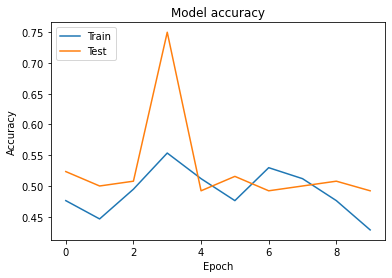

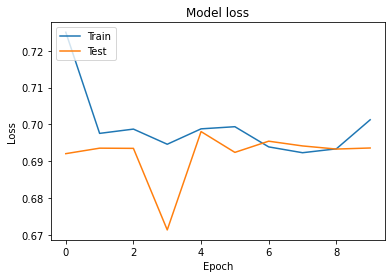

In [26]:
graph()

In [27]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(test_set)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
5/5 [==============================] - 2s 308ms/step - loss: 0.6932 - accuracy: 0.5038
Test Accuracy: 50.375938415527344
